### Exercícios Aula 6 - Gabriel Alencar Nunes Ferreira

Faça a leitura do arquivo movies.csv
column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'gross', 'movie_title', 'num_user_for_reviews', 'country', 'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

1. Qual o filme com o maior lucro?
2. Qual o filme que deu o maior prejuízo
3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
4. Uma plotagem do genero do filme.
5. Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
6. Qual o Genero mais popular e menos popular?
7. Existe relação entre os melhores filme e seu Budget?
8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
9. Mostre num gráfico a quantidade de filmes ao passar do ano

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
movies = pd.read_csv('dados/movies.csv', header=None,
                     names=['color',
                            'director_name', 'num_critic_for_reviews', 'duration', 'gross',
                            'movie_title', 'num_user_for_reviews', 'country', 'cotent_rating',
                            'budget', 'title_year', 'imdb_score', 'genre'], delimiter='|')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   100 non-null    object 
 1   director_name           100 non-null    object 
 2   num_critic_for_reviews  100 non-null    object 
 3   duration                100 non-null    object 
 4   gross                   100 non-null    object 
 5   movie_title             100 non-null    object 
 6   num_user_for_reviews    100 non-null    object 
 7   country                 100 non-null    object 
 8   cotent_rating           100 non-null    object 
 9   budget                  100 non-null    object 
 10  title_year              100 non-null    object 
 11  imdb_score              100 non-null    float64
 12  genre                   100 non-null    object 
dtypes: float64(1), object(12)
memory usage: 10.3+ KB


In [10]:
movies['budget'] = movies['budget'].str.replace(',', '')

In [11]:
movies[['gross', 'budget', 'title_year']] = movies[['gross', 'budget', 'title_year']].replace('?', np.nan)

In [12]:
movies[['gross', 'budget']] = movies[['gross', 'budget']].astype(float).fillna(0).astype(int)
movies['title_year'] = movies['title_year'].astype(float).fillna(0).astype(int)
movies['profit'] = movies['gross'].astype(float) - movies['budget'].astype(float)

In [7]:
# 1 

print(movies.iloc[movies['profit'].idxmax()])

color                             Color
director_name             James Cameron
num_critic_for_reviews            723.0
duration                          178.0
gross                         760505847
movie_title                     Avatar 
num_user_for_reviews             3054.0
country                             USA
cotent_rating                     PG-13
budget                        237000000
title_year                         2009
imdb_score                          7.9
genre                            Action
profit                      523505847.0
Name: 0, dtype: object


In [8]:
# 2

print(movies.iloc[movies['profit'].idxmin()])

color                              Color
director_name             Andrew Stanton
num_critic_for_reviews             462.0
duration                           132.0
gross                           73058679
movie_title                 John Carter 
num_user_for_reviews               738.0
country                              USA
cotent_rating                      PG-13
budget                         263700000
title_year                          2012
imdb_score                           6.6
genre                             Action
profit                      -190641321.0
Name: 5, dtype: object


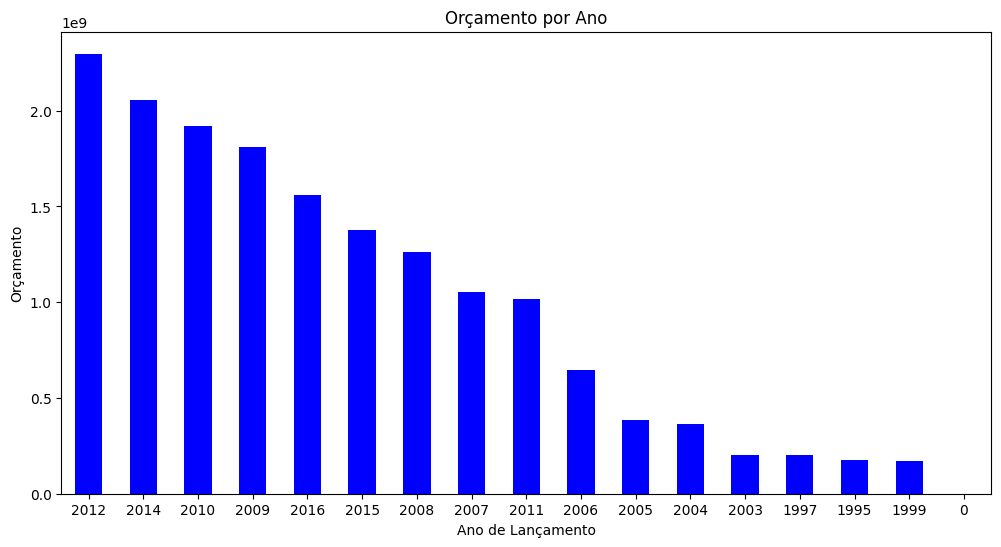

In [14]:
# 3

budget_per_year = movies.groupby('title_year')['budget'].sum().sort_values(ascending=False)

budget_per_year = budget_per_year.iloc[1:]

# budget_per_year

plt.figure(figsize=(12, 6))
budget_per_year.plot(kind='bar', color='blue')
plt.title('Orçamento por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Orçamento')
plt.xticks(rotation=0)
plt.show()

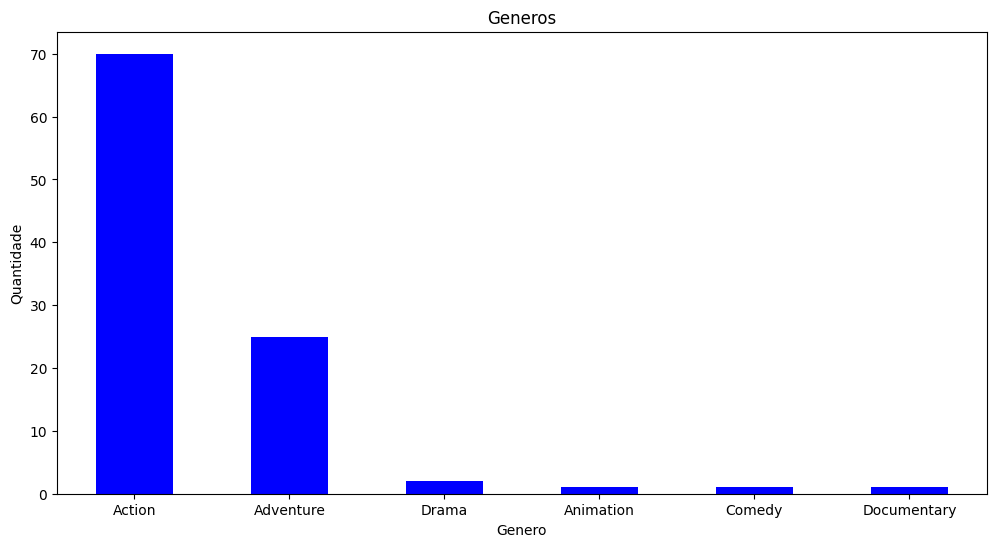

In [10]:
# 4

# movies.value_counts('genre')

plt.figure(figsize=(12, 6))
movies.value_counts('genre').plot(kind='bar', color='blue')
plt.title('Generos')
plt.xlabel('Genero')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()


In [11]:
# 5 - infelizmente já vi a maioria pra servir de sugestão hehehe

movies.nlargest(10, columns='imdb_score')

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,profit
66,Color,Christopher Nolan,645.0,152.0,533316061,The Dark Knight,4667.0,USA,PG-13,185000000,2008,9.0,Action,348316061.0
97,Color,Christopher Nolan,642.0,148.0,292568851,Inception,2803.0,USA,PG-13,160000000,2010,8.8,Action,132568851.0
96,Color,Christopher Nolan,712.0,169.0,187991439,Interstellar,2725.0,USA,PG-13,165000000,2014,8.6,Adventure,22991439.0
3,Color,Christopher Nolan,813.0,164.0,448130642,The Dark Knight Rises,2701.0,USA,PG-13,250000000,2012,8.5,Action,198130642.0
58,Color,Andrew Stanton,421.0,98.0,223806889,WALL·E,1043.0,USA,G,180000000,2008,8.4,Adventure,43806889.0
43,Color,Lee Unkrich,453.0,103.0,414984497,Toy Story 3,733.0,USA,G,200000000,2010,8.3,Adventure,214984497.0
67,Color,Pete Docter,408.0,96.0,292979556,Up,704.0,USA,PG,175000000,2009,8.3,Adventure,117979556.0
78,Color,Pete Docter,536.0,95.0,356454367,Inside Out,773.0,USA,PG,175000000,2015,8.3,Adventure,181454367.0
27,Color,Anthony Russo,516.0,147.0,407197282,Captain America: Civil War,1022.0,USA,PG-13,250000000,2016,8.2,Action,157197282.0
93,Color,Dean DeBlois,288.0,98.0,217387997,How to Train Your Dragon,492.0,USA,PG,165000000,2010,8.2,Adventure,52387997.0


In [12]:
# 6 - Aqui escolhi usar o número de reviews de usuário, porque a quantidade de filmes por genero já foi plotada na questão # 4

movies['num_user_for_reviews'] = movies['num_user_for_reviews'].replace('?', np.nan)
movies['num_user_for_reviews'] = movies['num_user_for_reviews'].astype(float).fillna(0).astype(int)


# Resolvi fazer a média já que a participação dos filmes de ação na base é muito grande
# resultando em que o genero mais popular na média de usuários fazendo review é Drama
# e o menos popular é documentário

print(movies.groupby('genre')['num_user_for_reviews'].mean())

genre
Action         1102.814286
Adventure       715.600000
Animation       249.000000
Comedy          257.000000
Documentary       0.000000
Drama          1640.500000
Name: num_user_for_reviews, dtype: float64


In [13]:
# 7
print(f'O cálculo de correlação entre orçamento e score é: {movies["budget"].corr(movies["imdb_score"]):.2f}')

# parece que não está relacionado

O cálculo de correlação entre orçamento e score é: 0.09


In [14]:
# 8

# provávelmente existem meios de fazer melhor essa análise, mas eu fiz assim e não parece haver correlação entre ser bom diretor e orçamento alto demais

movies.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)


director_name
Christopher Nolan    8.725
Lee Unkrich          8.300
Pete Docter          8.300
Hideaki Anno         8.200
Dean DeBlois         8.200
James Gunn           8.100
Anthony Russo        8.000
Doug Liman           7.900
Don Hall             7.900
James Cameron        7.800
Name: imdb_score, dtype: float64

In [15]:
movies.groupby('director_name')['budget'].mean().sort_values(ascending=False).head(10)

director_name
Nathan Greno      2.600000e+08
Rob Marshall      2.500000e+08
Gore Verbinski    2.466667e+08
Zack Snyder       2.375000e+08
Joss Whedon       2.350000e+08
Sam Raimi         2.243333e+08
Sam Mendes        2.225000e+08
Andrew Stanton    2.218500e+08
James Cameron     2.185000e+08
Peter Jackson     2.155000e+08
Name: budget, dtype: float64

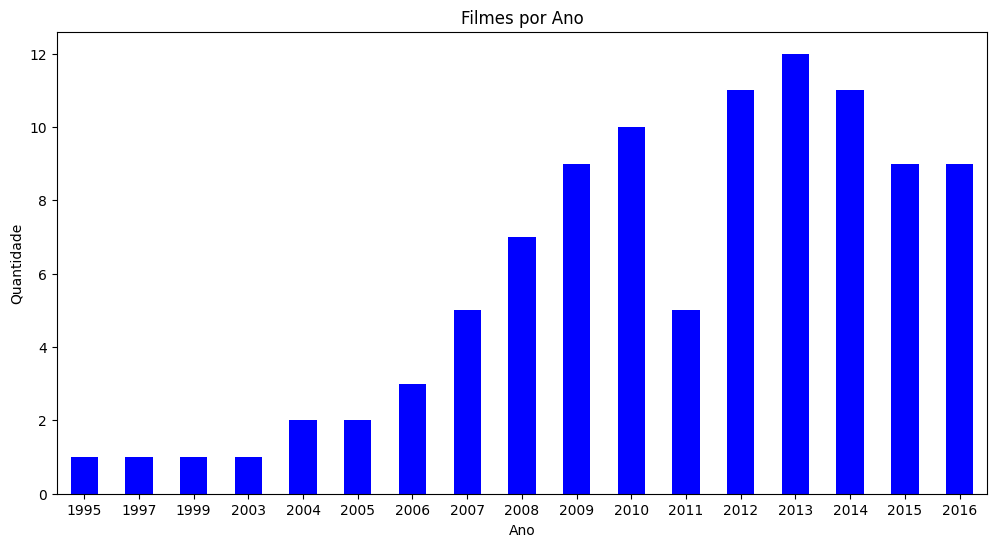

In [15]:
# 9

#movies.groupby('title_year').value_counts()

plt.figure(figsize=(12, 6))
movies.value_counts('title_year').sort_index().drop(0).plot(kind='bar', color='blue')
plt.title('Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()